## FOREST FIRE AREA PREDICT (ANALYSIS)

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 1000)
plotsize=(16, 9)

In [2]:
data = pd.read_csv('datasets/forest_fire_dataset.csv')
print('Количество признаков:', len(data.columns))
print('Количество объектов:', len(data))

Количество признаков: 13
Количество объектов: 517


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
print(data)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [6]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [7]:
data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [8]:
cleared_data = data[data['area'] > 0.0]
cleared_data.info()
print(cleared_data.sort_values('area'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 138 to 514
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       270 non-null    int64  
 1   Y       270 non-null    int64  
 2   month   270 non-null    object 
 3   day     270 non-null    object 
 4   FFMC    270 non-null    float64
 5   DMC     270 non-null    float64
 6   DC      270 non-null    float64
 7   ISI     270 non-null    float64
 8   temp    270 non-null    float64
 9   RH      270 non-null    int64  
 10  wind    270 non-null    float64
 11  rain    270 non-null    float64
 12  area    270 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 29.5+ KB
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
246  5  4   aug  sun  91.8  175.1  700.7  13.8  25.7  39   5.4   0.0     0.09
266  6  5   aug  tue  94.3  131.7  607.1  22.7  19.4  55   4.0   0.0     0.17
252  6  5   aug  wed  93.1  157.3  666.7 

In [9]:
cleared_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.807407,4.366667,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185
std,2.383326,1.170740,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635
min,1.000000,2.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,3.000000,4.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000
50%,5.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000
75%,7.000000,5.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500
max,9.000000,9.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000


In [10]:
null_data = data[data['area'] == 0.0]
null_data.info()
print(null_data.sort_values('area'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       247 non-null    int64  
 1   Y       247 non-null    int64  
 2   month   247 non-null    object 
 3   day     247 non-null    object 
 4   FFMC    247 non-null    float64
 5   DMC     247 non-null    float64
 6   DC      247 non-null    float64
 7   ISI     247 non-null    float64
 8   temp    247 non-null    float64
 9   RH      247 non-null    int64  
 10  wind    247 non-null    float64
 11  rain    247 non-null    float64
 12  area    247 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 27.0+ KB
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
298  8  6   jun  wed  91.2  147.8  377.2  12.7  19.6  43   4.9   0.0   0.0
299  6  5   jun  sat  53.4   71.0  233.8   0.4  10.6

In [11]:
null_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.0
mean,4.518219,4.226721,90.219028,106.679757,522.878138,8.851822,18.427935,44.894737,3.913360,0.013765,0.0
std,2.230305,1.289898,6.965969,66.300811,264.637833,4.974102,5.344018,17.581779,1.681857,0.100268,0.0
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,4.200000,15.000000,0.900000,0.000000,0.0
25%,3.000000,4.000000,90.200000,51.300000,360.100000,6.300000,15.200000,32.000000,2.700000,0.000000,0.0
50%,4.000000,4.000000,91.600000,103.200000,661.300000,8.400000,18.600000,42.000000,3.600000,0.000000,0.0
75%,6.000000,5.000000,92.600000,142.400000,706.500000,10.600000,21.600000,54.000000,5.150000,0.000000,0.0
max,9.000000,9.000000,96.200000,290.000000,855.300000,56.100000,32.400000,100.000000,8.500000,1.000000,0.0


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


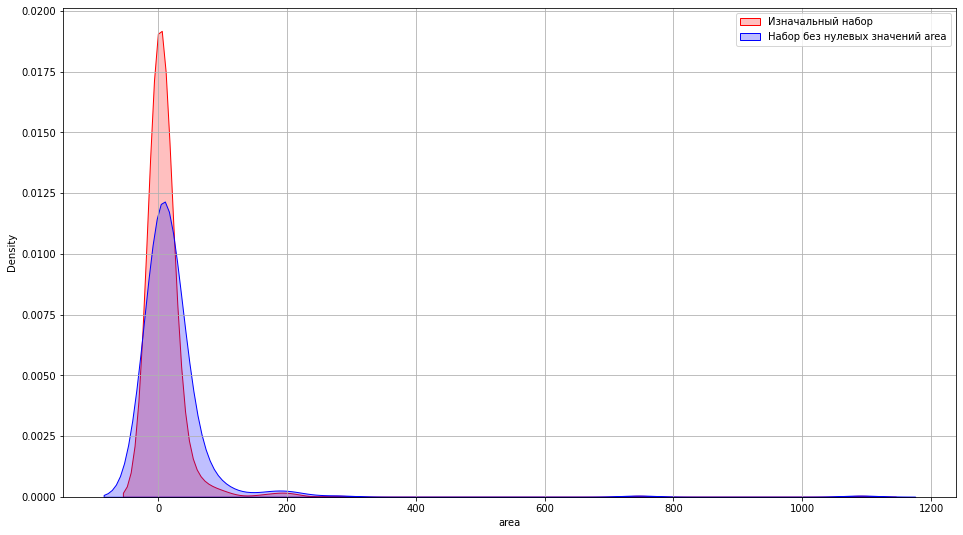

In [12]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.kdeplot(data['area'], shade=True, color='r', label="Изначальный набор")
sns.kdeplot(cleared_data['area'], shade=True, color='b', label="Набор без нулевых значений area")
sns.kdeplot(null_data['area'], shade=True, color='g', label="Набор нулевых значений area")
plt.legend()

In [13]:
cleared_data['month'].value_counts()

aug    99
sep    97
mar    19
jul    18
feb    10
dec     9
jun     8
oct     5
apr     4
may     1
Name: month, dtype: int64

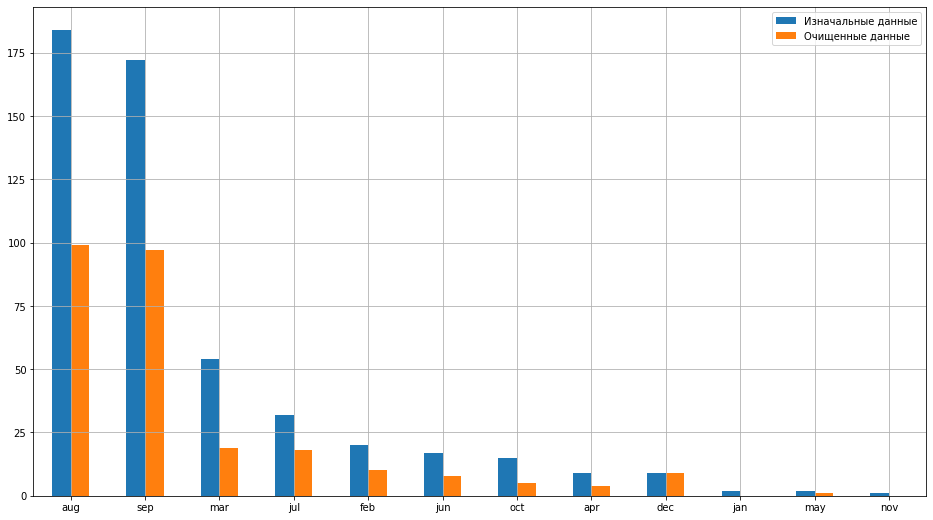

In [14]:
months = data['month'].value_counts().keys()
df = pd.DataFrame({'Изначальные данные': [sum(data['month']==i) for i in months],
                   'Очищенные данные': [sum(cleared_data['month']==i) for i in months]}, index=months)

ax = df.plot.bar(rot=0, figsize=plotsize, grid=True)

<AxesSubplot:xlabel='month', ylabel='area'>

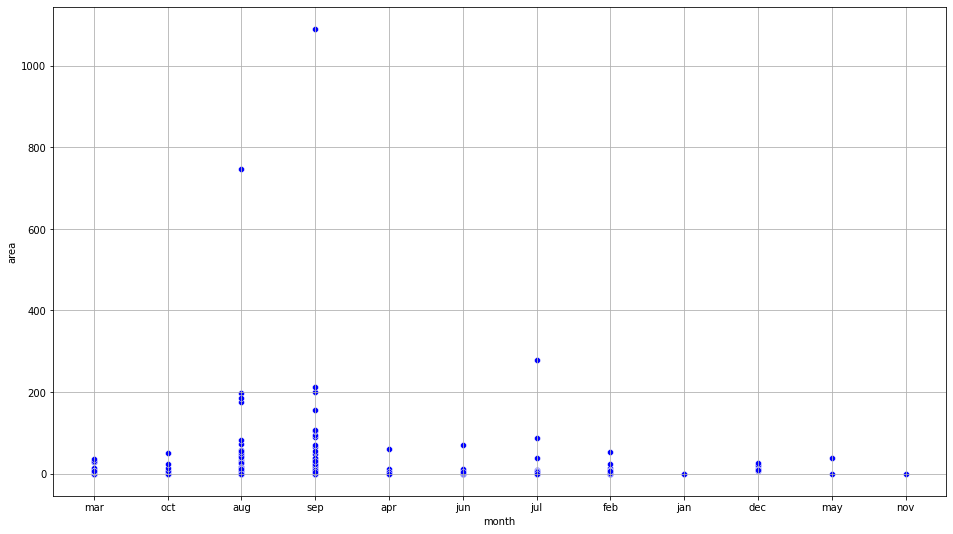

In [15]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.scatterplot(x='month', y='area', data=data, color='b')

<AxesSubplot:xlabel='month', ylabel='area'>

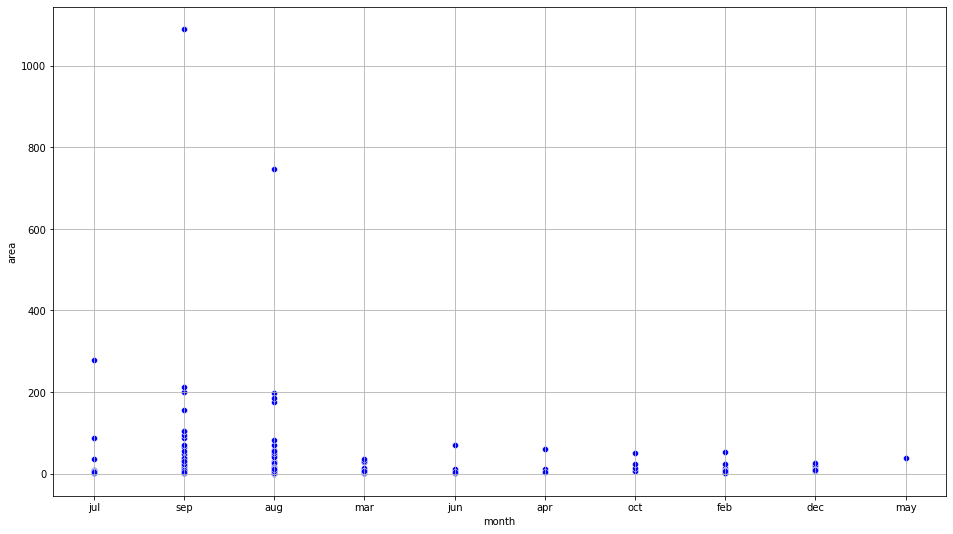

In [16]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.scatterplot(x='month', y='area', data=cleared_data, estimator='mean', color='b')

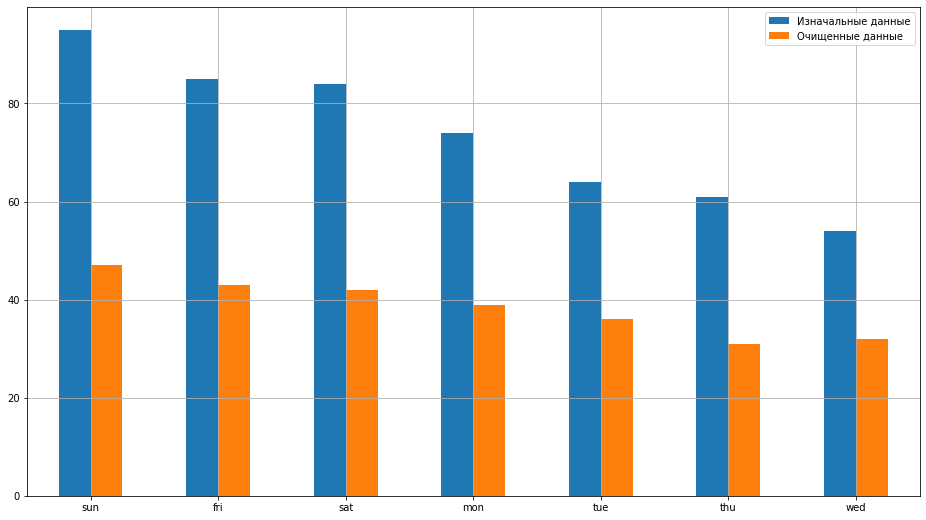

In [17]:
days = data['day'].value_counts().keys()
df = pd.DataFrame({'Изначальные данные': [sum(data['day']==i) for i in days],
                   'Очищенные данные': [sum(cleared_data['day']==i) for i in days]}, index=days)

ax = df.plot.bar(rot=0, figsize=plotsize, grid=True)

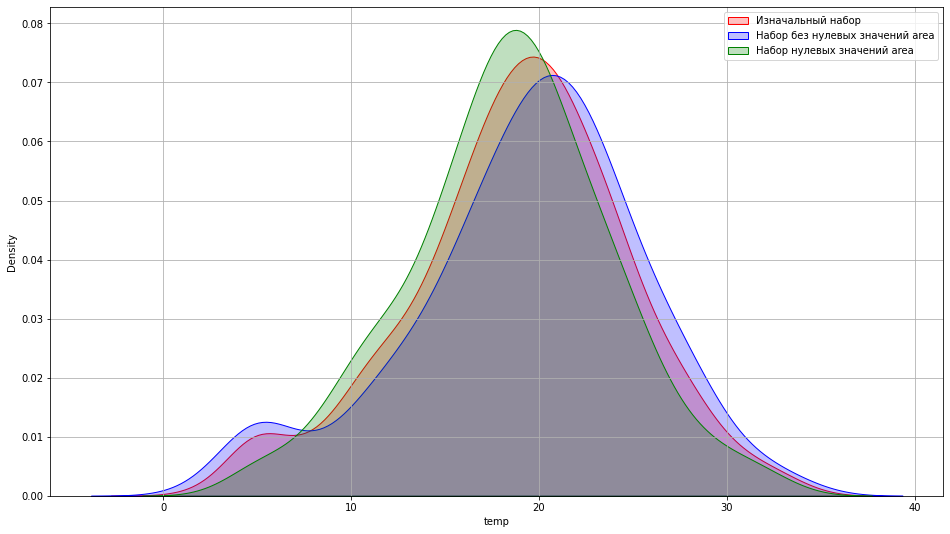

In [18]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.kdeplot(data['temp'], shade=True, color='r', label="Изначальный набор")
sns.kdeplot(cleared_data['temp'], shade=True, color='b', label="Набор без нулевых значений area")
sns.kdeplot(null_data['temp'], shade=True, color='g', label="Набор нулевых значений area")
plt.legend()

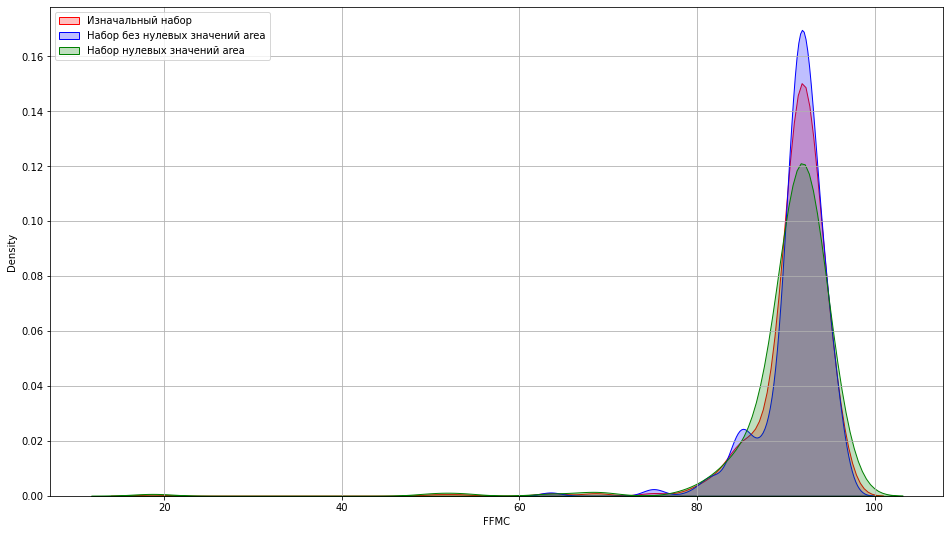

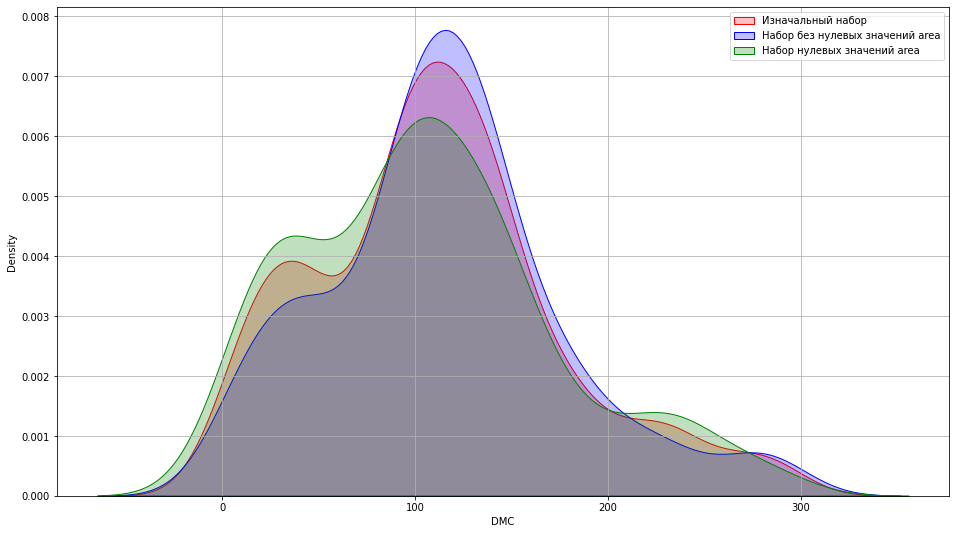

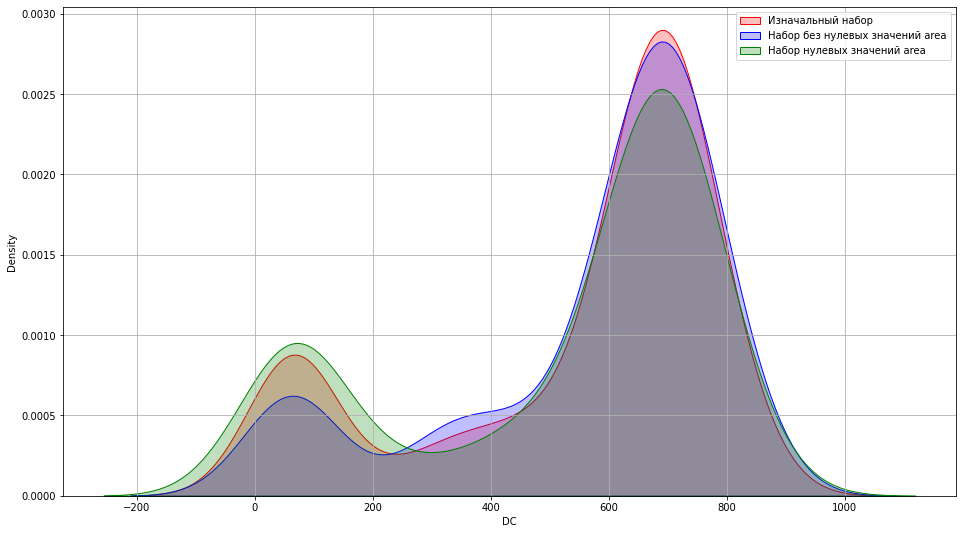

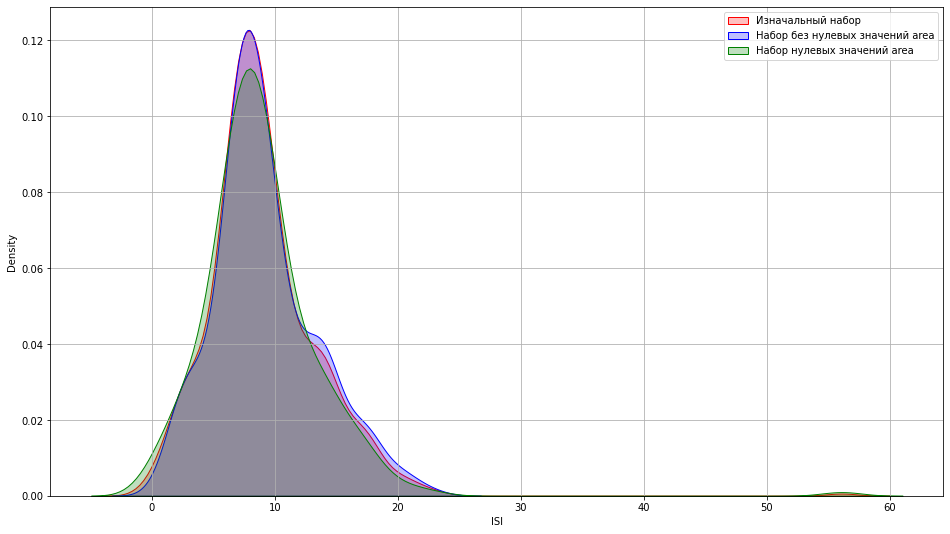

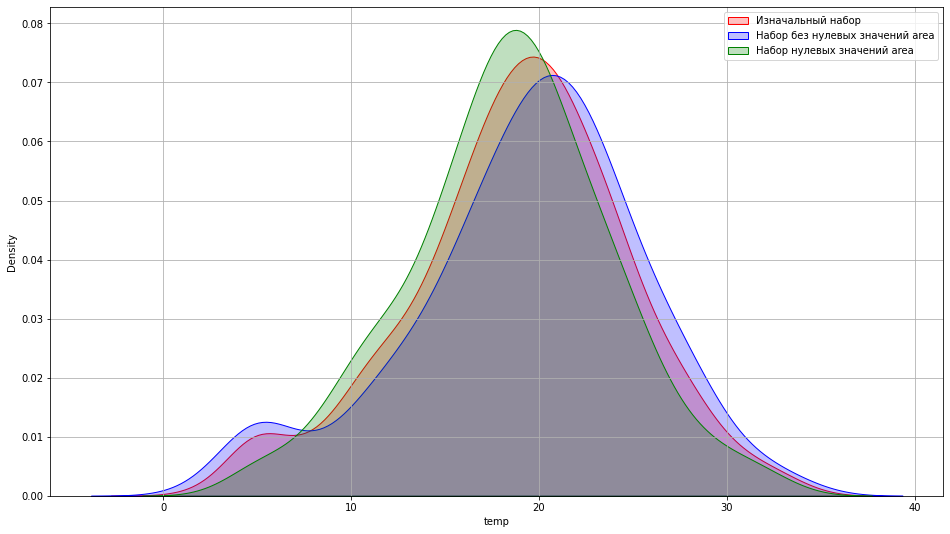

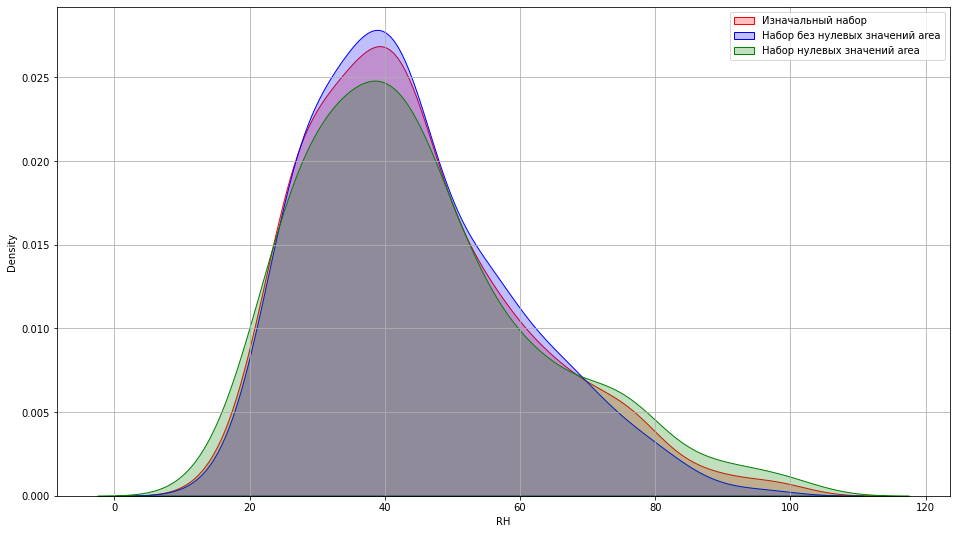

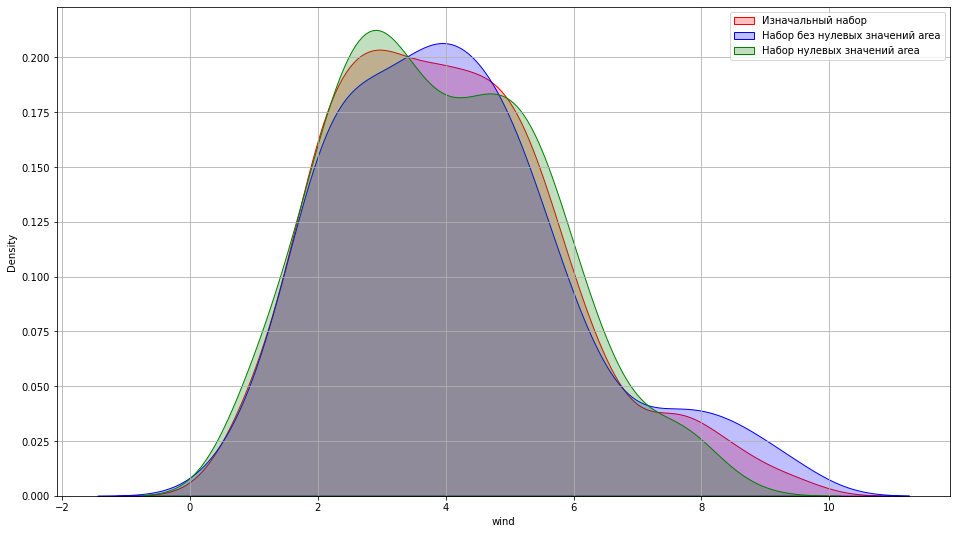

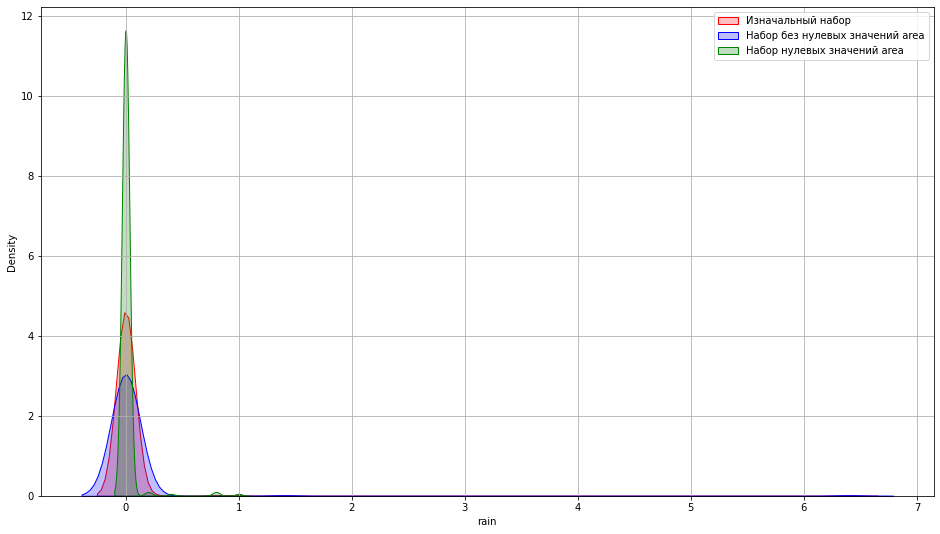

In [19]:
for param in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']:
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.kdeplot(data[param], shade=True, color='r', label="Изначальный набор")
    sns.kdeplot(cleared_data[param], shade=True, color='b', label="Набор без нулевых значений area")
    sns.kdeplot(null_data[param], shade=True, color='g', label="Набор нулевых значений area")
    if param == 'FFMC':
        plt.legend(loc='upper left')
    else:
        plt.legend()

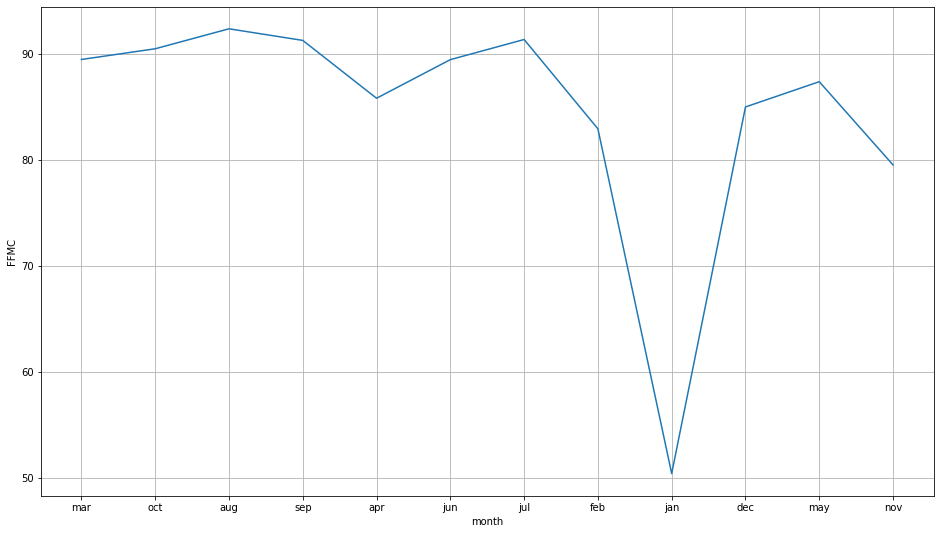

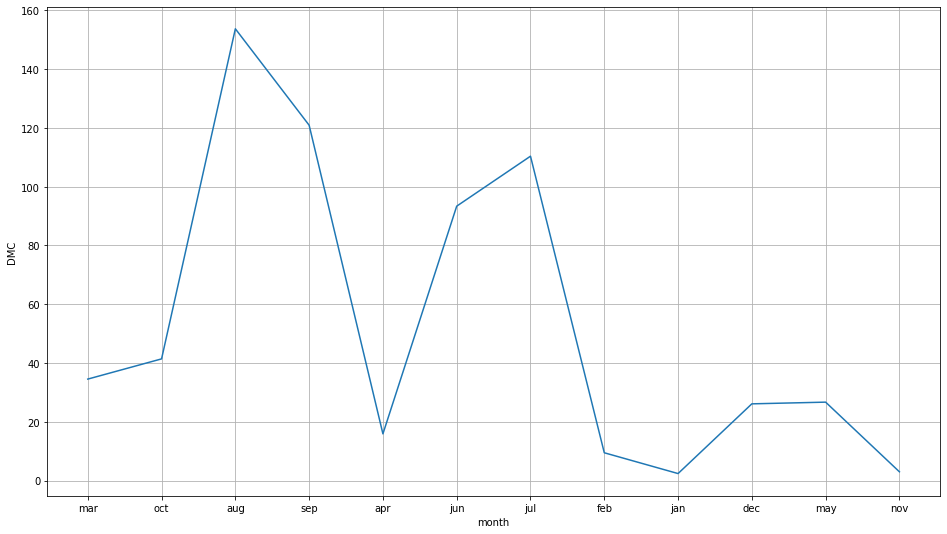

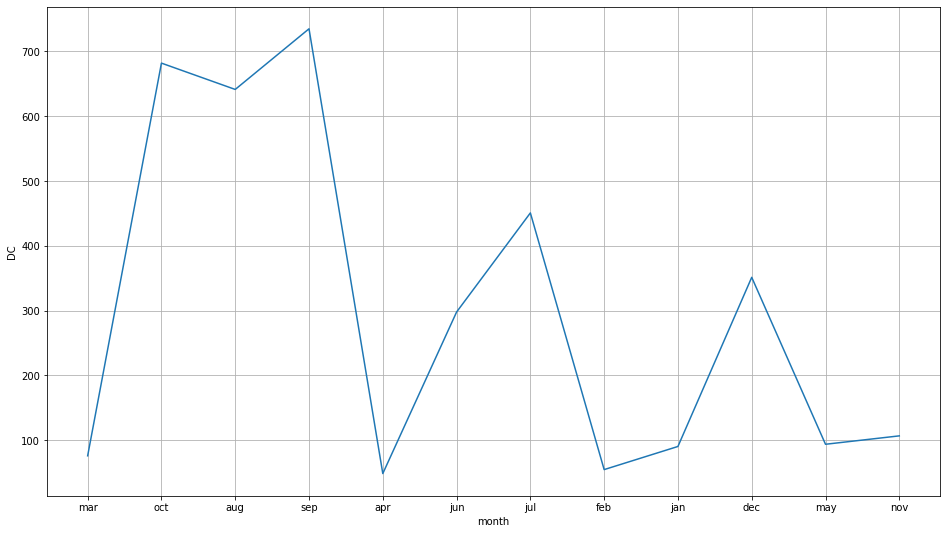

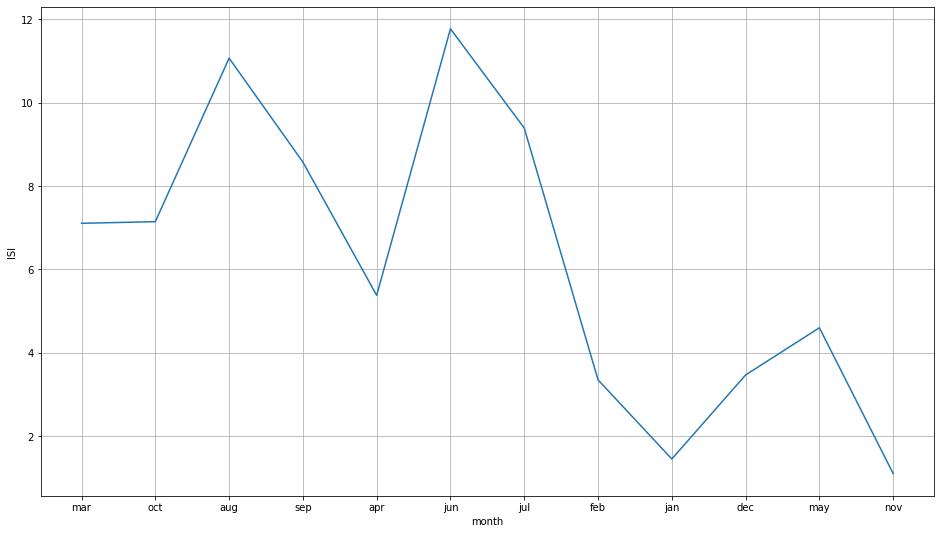

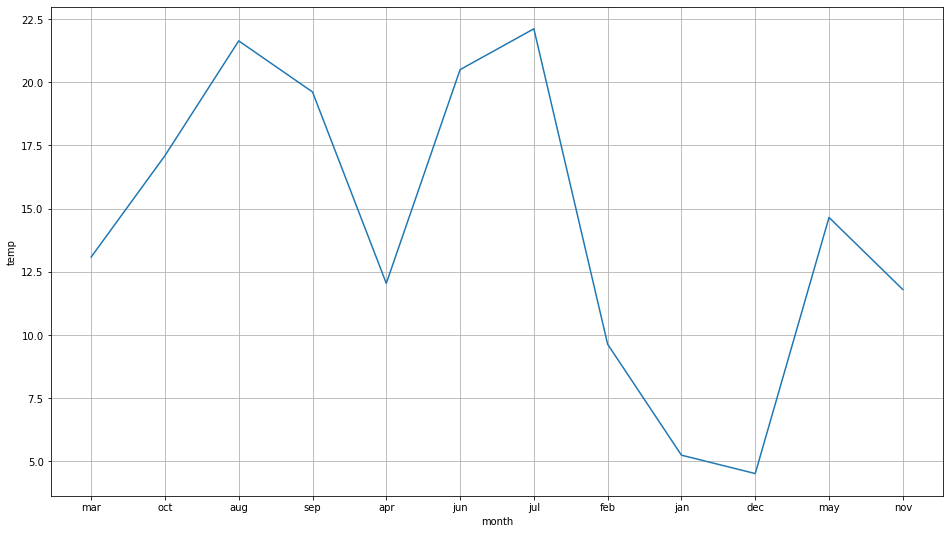

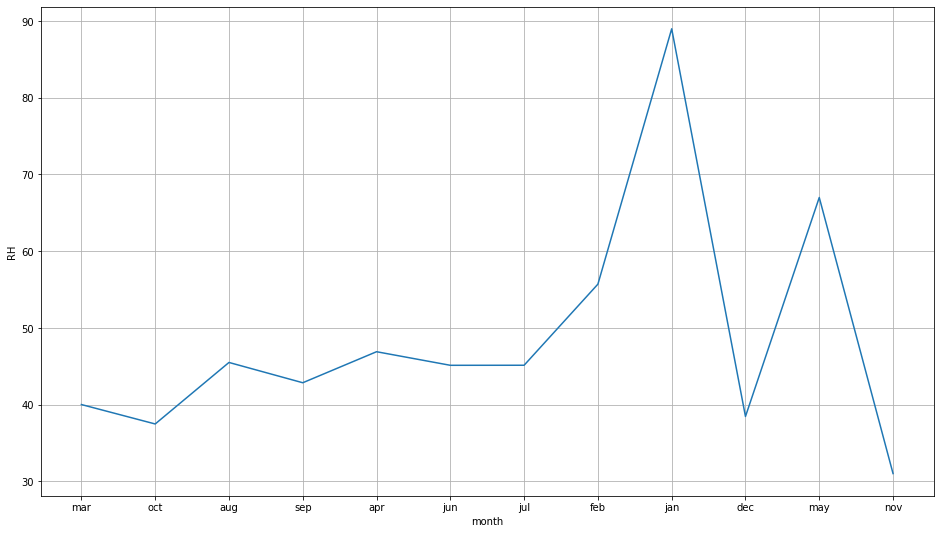

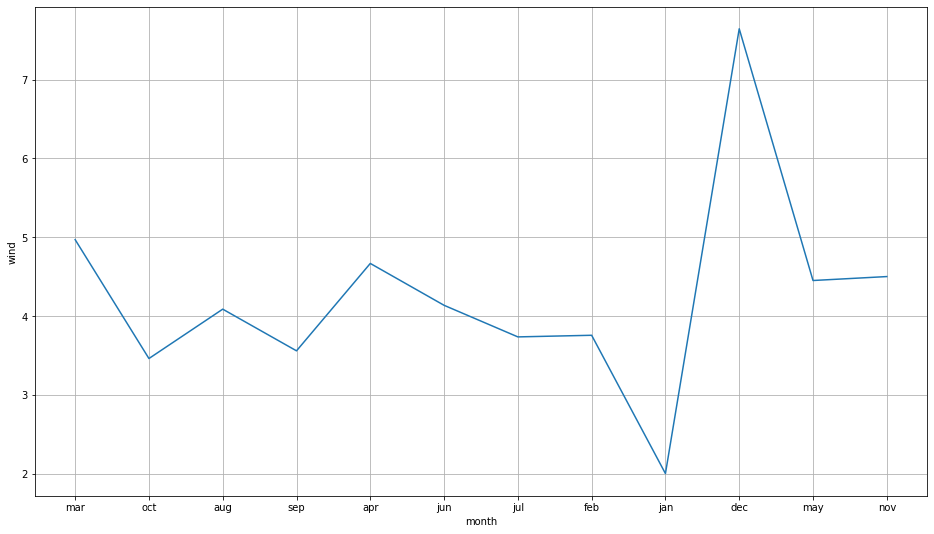

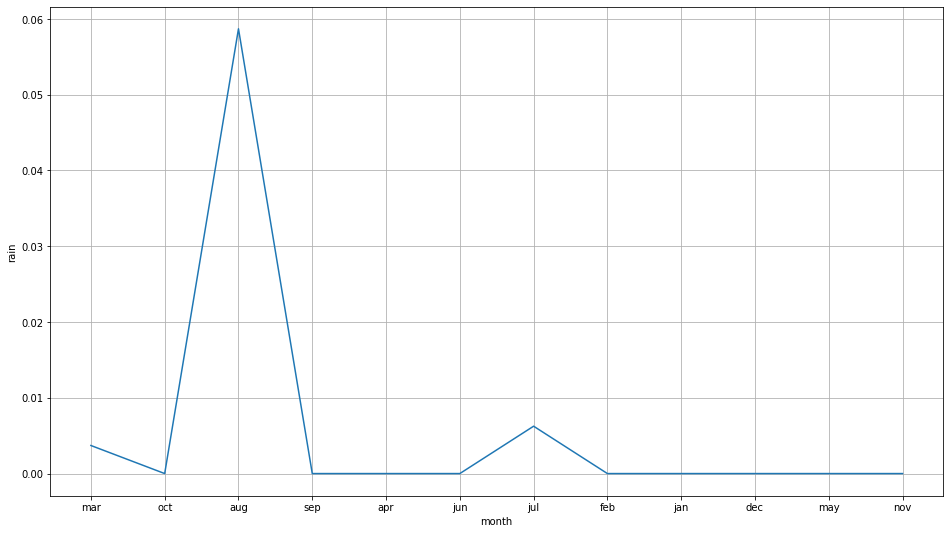

In [20]:
for col in data:
    if col in  ['month', 'X', 'Y', 'day', 'area']:
        continue
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.lineplot(x='month', y=col, data=data, estimator='mean', err_style=None)
#     sns.lineplot(x='month', y='area', data=data, estimator='sum', err_style=None)

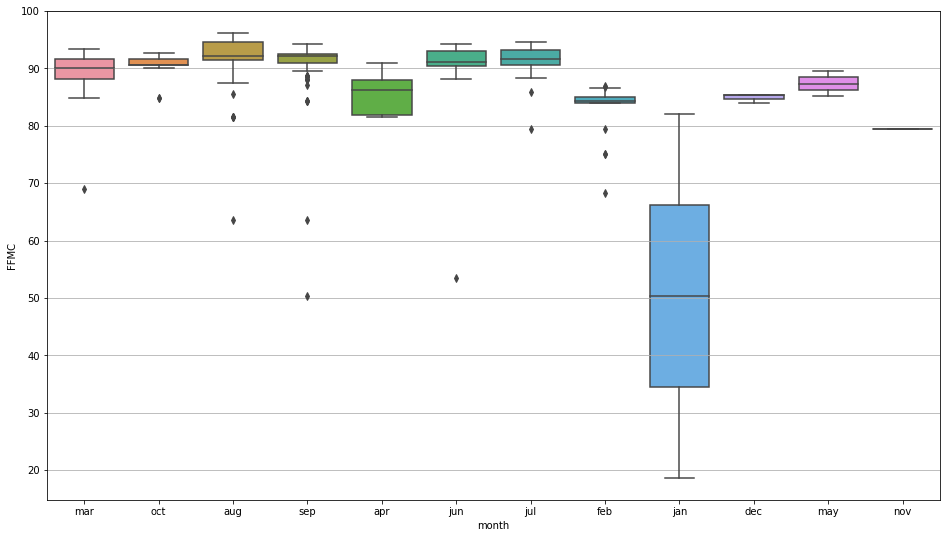

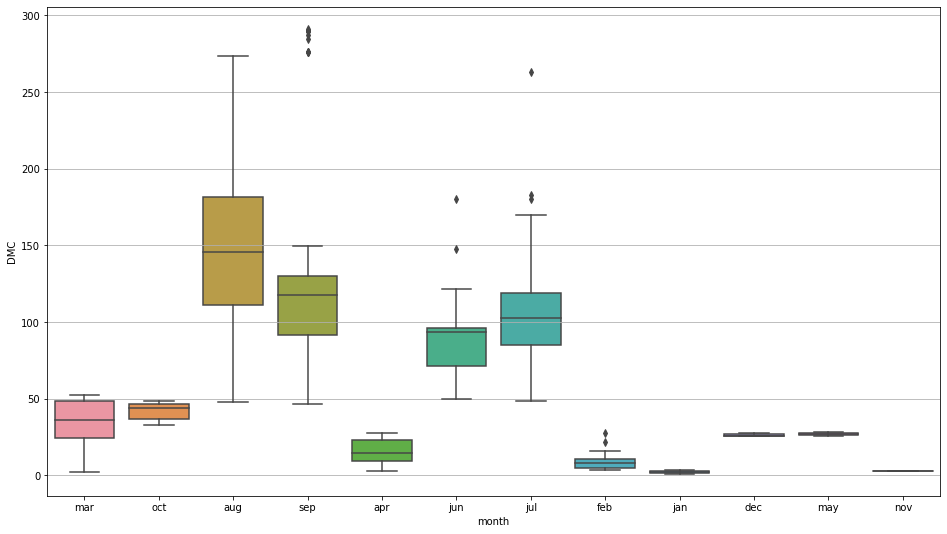

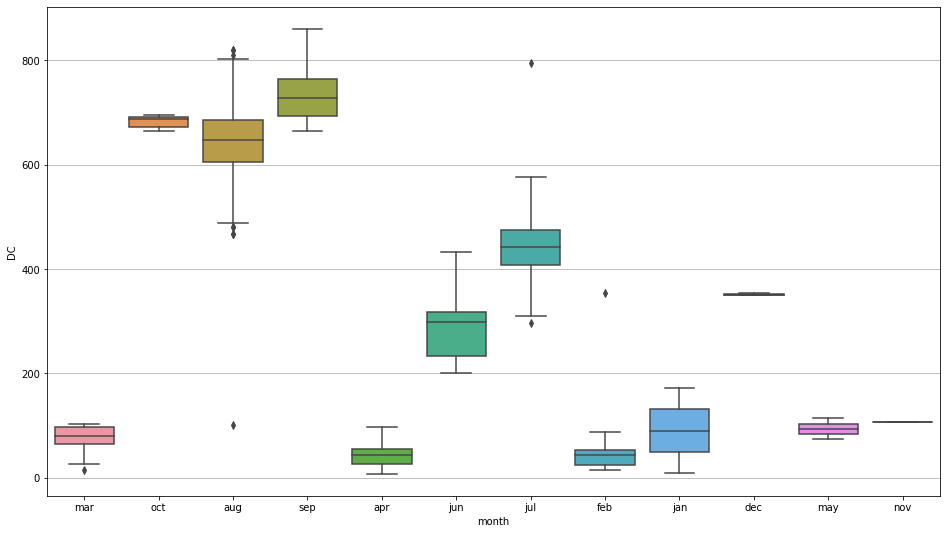

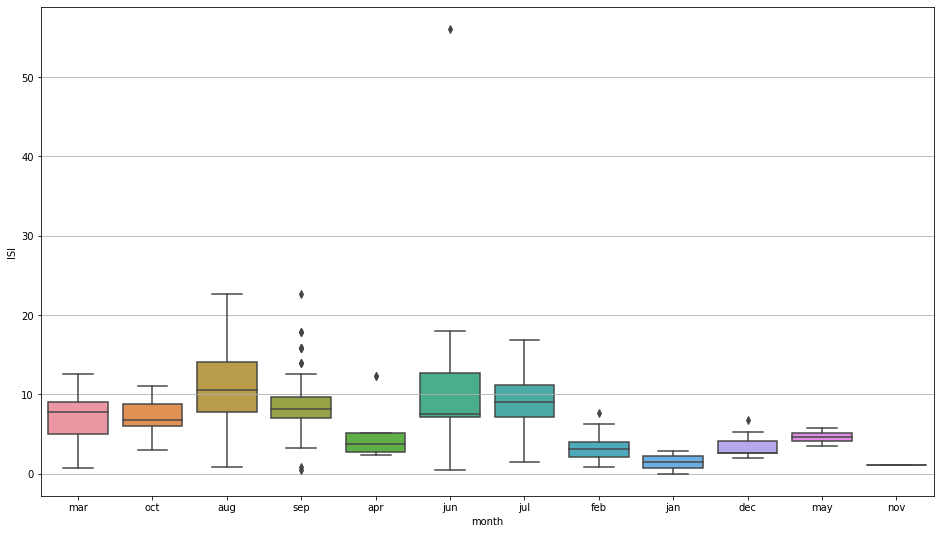

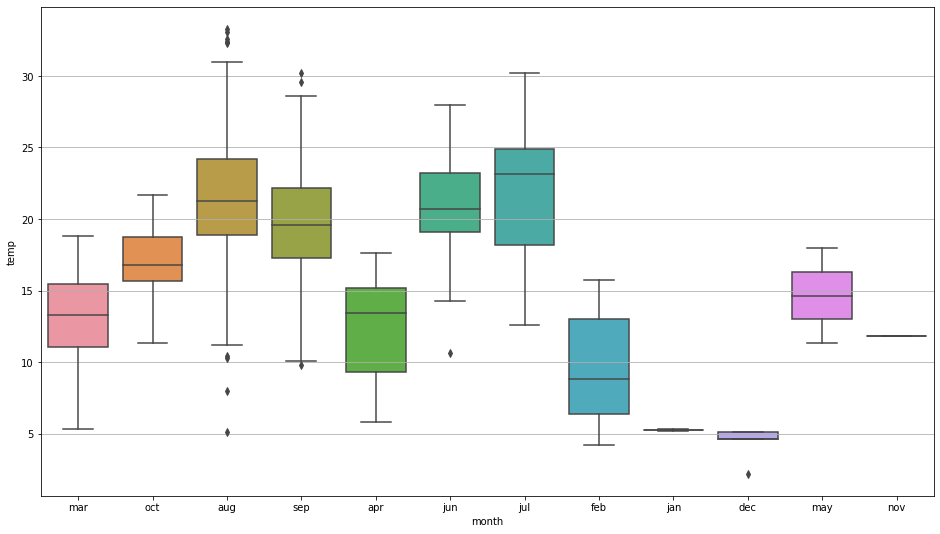

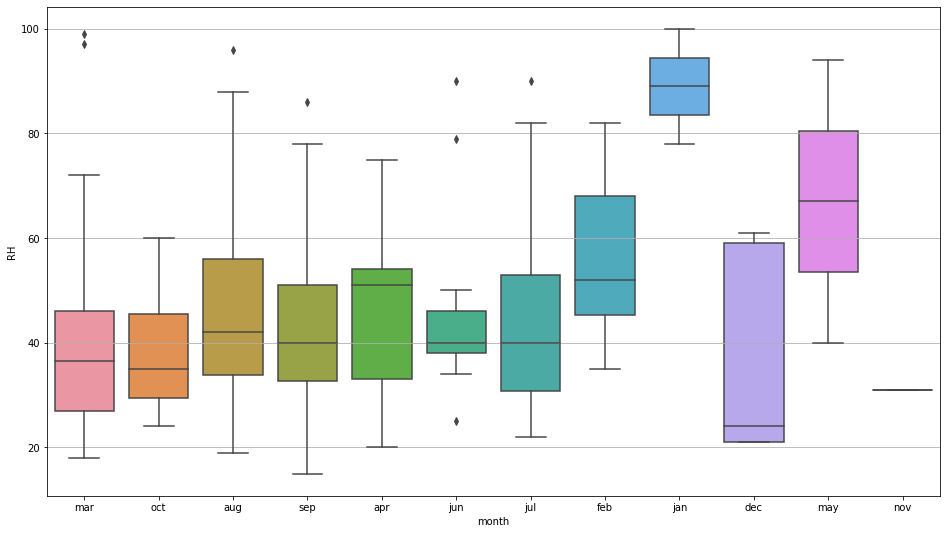

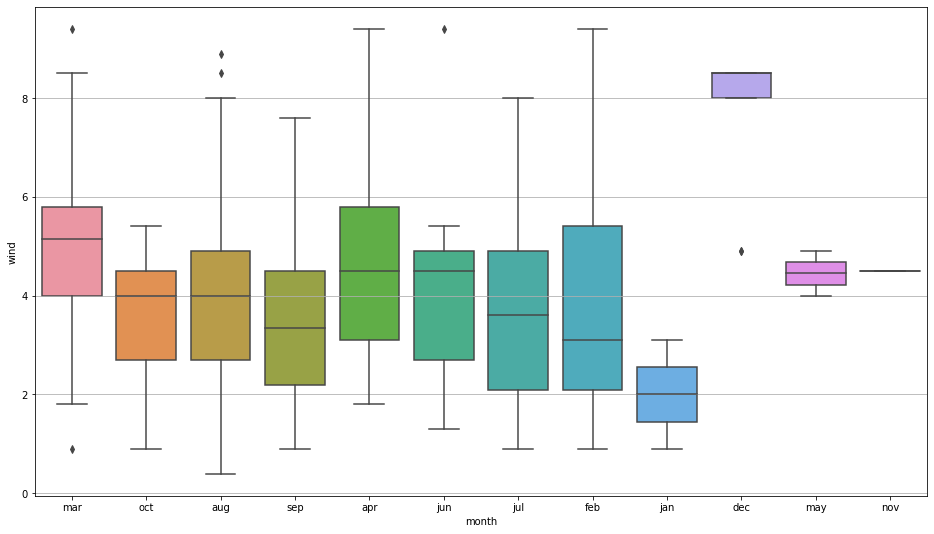

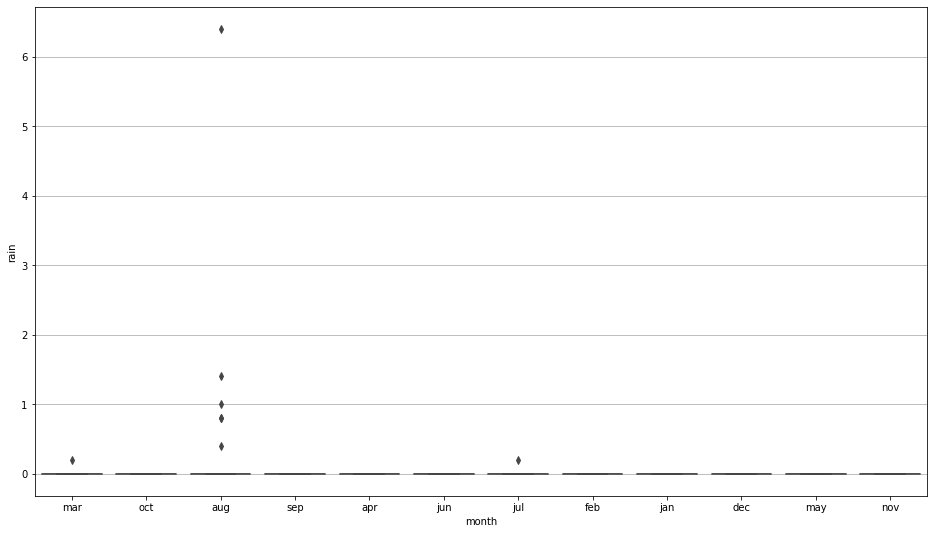

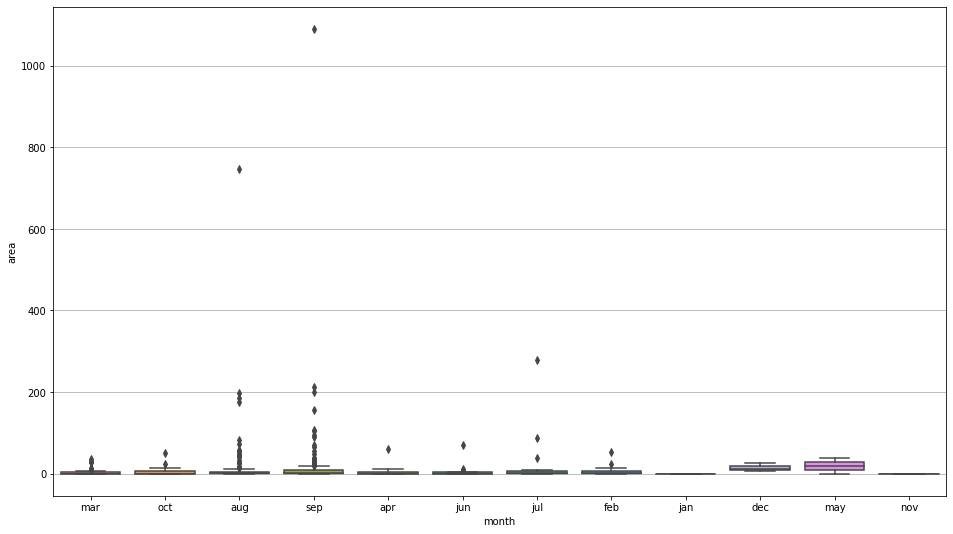

In [21]:
for col in data:
    if col in ['month', 'X', 'Y', 'day']:
        continue
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.boxplot(x='month', y=col, data=data)

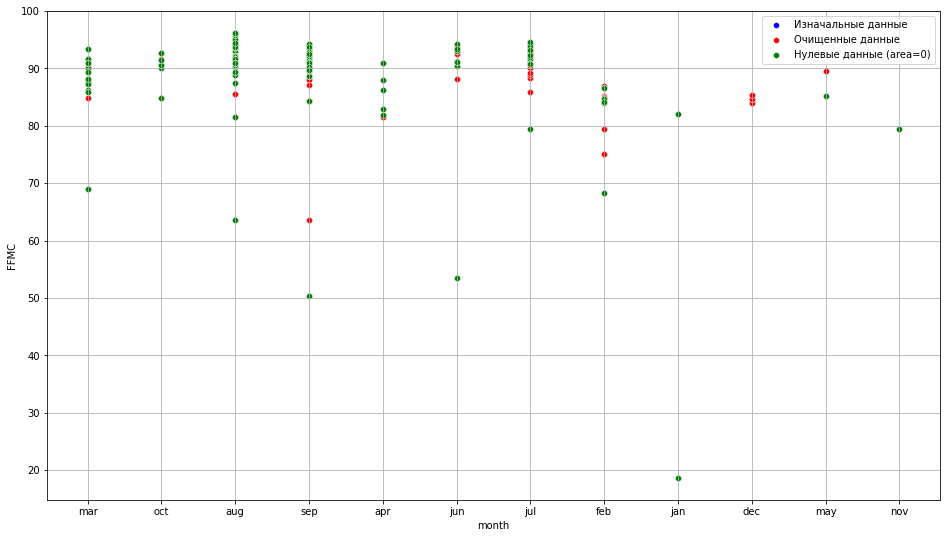

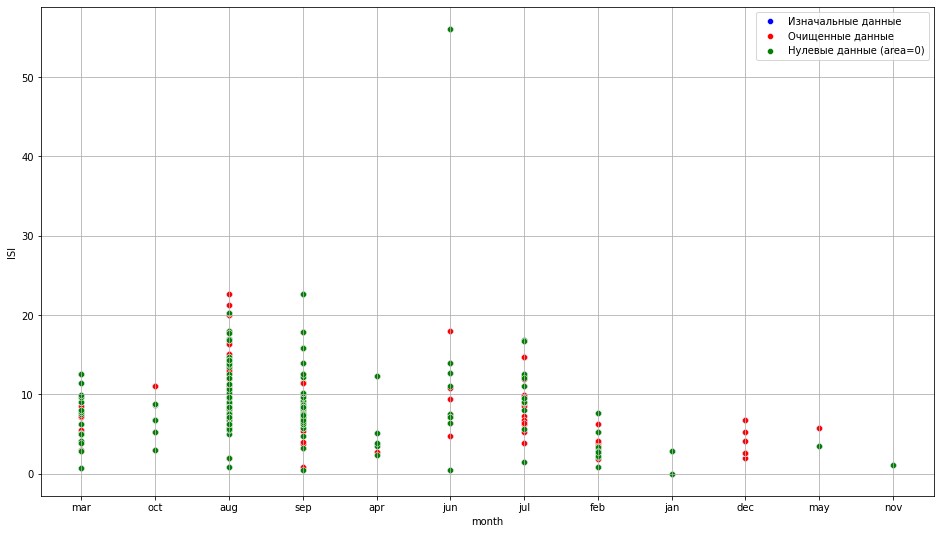

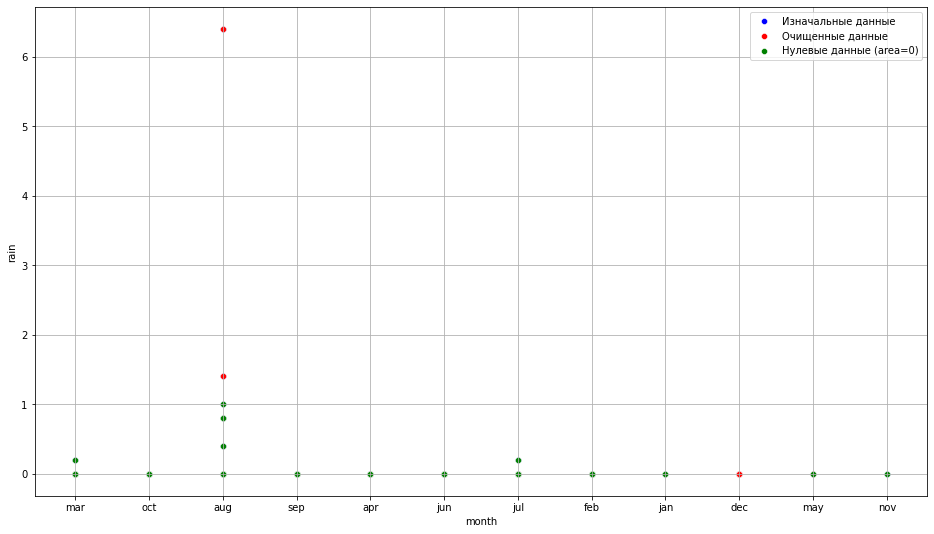

In [22]:
for param in ['FFMC', "ISI", "rain"]:
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.scatterplot(x='month', y=param, data=data, color='b', label='Изначальные данные')
    sns.scatterplot(x='month', y=param, data=cleared_data, color='r', label='Очищенные данные')
    sns.scatterplot(x='month', y=param, data=null_data, color='g', label='Нулевые данные (area=0)')
    plt.legend()

## ///////////////////////////////////////PREDICTION/////////////////////////////////////////

Выбросы обнаружены в area, FFMC, ISI, rain (в случае rain - только 8 случаев из 517 имеют ненулевые значения. По этой причине rain будет исключен):

Будем брать данные, входящие в 90-перцентиль (в случае FFMC - не входящие в 10-перцентиль)

Значения 90-перцентиля для ISI и area (10 для FFMC):

In [23]:
FFMC_filter_barrier = np.percentile(data.FFMC, 10)
print('FFMC =', FFMC_filter_barrier)
ISI_filter_barrier = np.percentile(data.ISI, 90)
print('ISI =', ISI_filter_barrier)
area_filter_barrier = np.percentile(data.area, 90)
print('area =', area_filter_barrier)

FFMC = 85.9
ISI = 14.3
area = 25.262000000000043


Количество исключенных записей по каждому критерию

In [24]:
print('FFMC: ', len(data[data['FFMC'] < FFMC_filter_barrier]))
print('ISI: ', len(data[data['ISI'] > ISI_filter_barrier]))
print('area: ', len(data[data['area'] > area_filter_barrier]))

FFMC:  51
ISI:  49
area:  52


Отфильтруем данные, сохранив удаленные записи:

In [25]:
df = data
df = df.loc[(df['FFMC'] >= FFMC_filter_barrier) & (df['ISI'] <= ISI_filter_barrier) & (df['area'] <= area_filter_barrier)]
print("Осталось записей: ", len(df))
deleted_df = pd.concat([data, df]).drop_duplicates(keep=False)

Осталось записей:  372


Удалим столбец rain

In [26]:
df = df.drop(['rain'], axis=1)

Отфильтрованные данные:

In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 515
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       372 non-null    int64  
 1   Y       372 non-null    int64  
 2   month   372 non-null    object 
 3   day     372 non-null    object 
 4   FFMC    372 non-null    float64
 5   DMC     372 non-null    float64
 6   DC      372 non-null    float64
 7   ISI     372 non-null    float64
 8   temp    372 non-null    float64
 9   RH      372 non-null    int64  
 10  wind    372 non-null    float64
 11  area    372 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 37.8+ KB


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,4.583333,4.271505,91.560215,118.990054,575.024731,8.709946,19.251613,43.913978,3.835484,2.419919
std,2.318574,1.201502,1.841650,62.856799,239.314816,2.602328,4.960977,15.418444,1.718985,4.280043
min,1.000000,2.000000,85.900000,6.600000,18.700000,2.800000,5.500000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.700000,84.775000,518.700000,7.000000,15.900000,33.000000,2.200000,0.000000
50%,4.000000,4.000000,91.600000,112.050000,671.200000,8.400000,19.400000,41.000000,3.600000,0.000000
75%,6.250000,5.000000,92.500000,147.300000,728.600000,10.100000,22.400000,53.000000,4.900000,3.112500
max,9.000000,9.000000,96.100000,291.300000,860.600000,14.300000,32.400000,99.000000,9.400000,24.590000


Плотность значений после фильтрации:

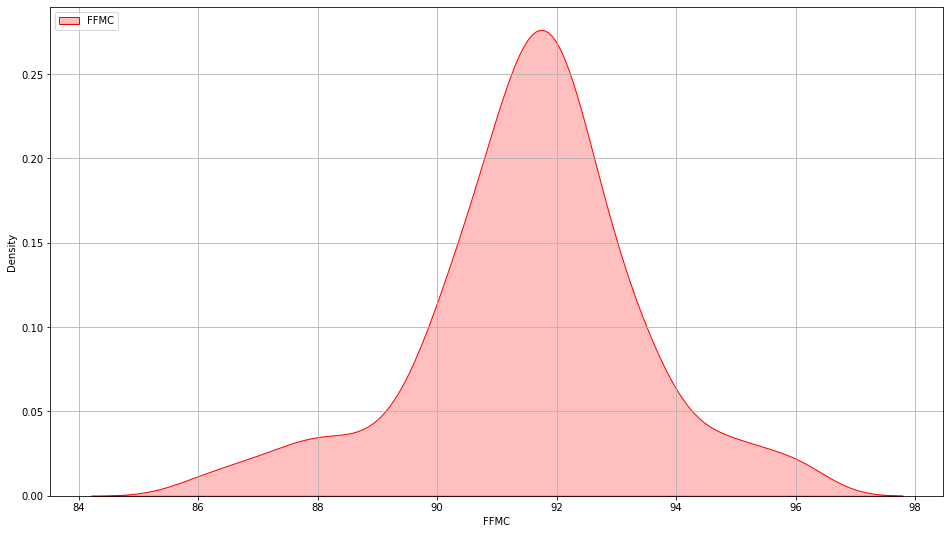

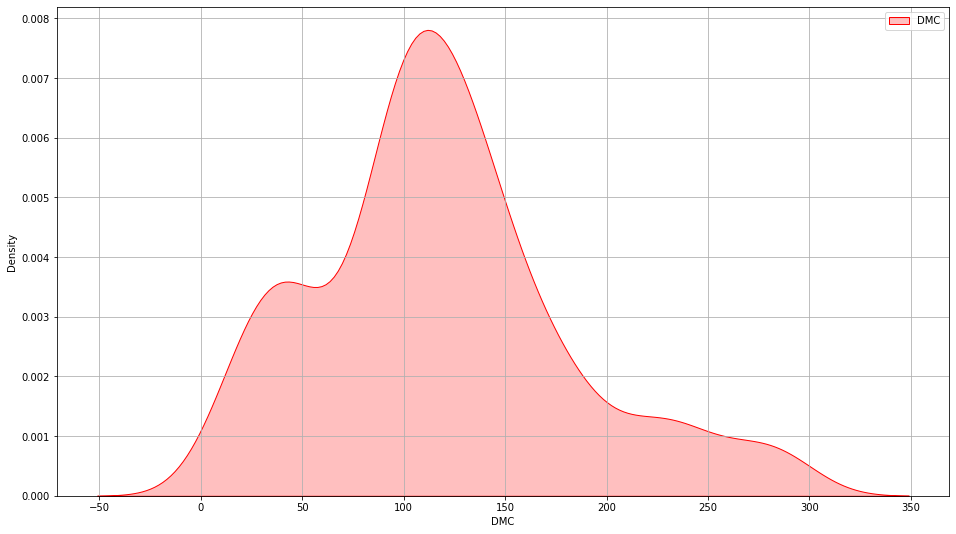

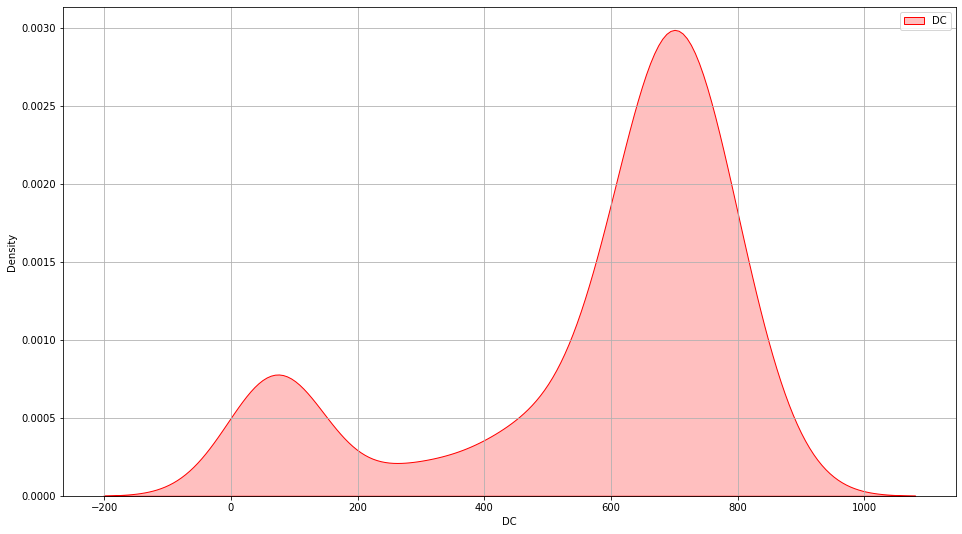

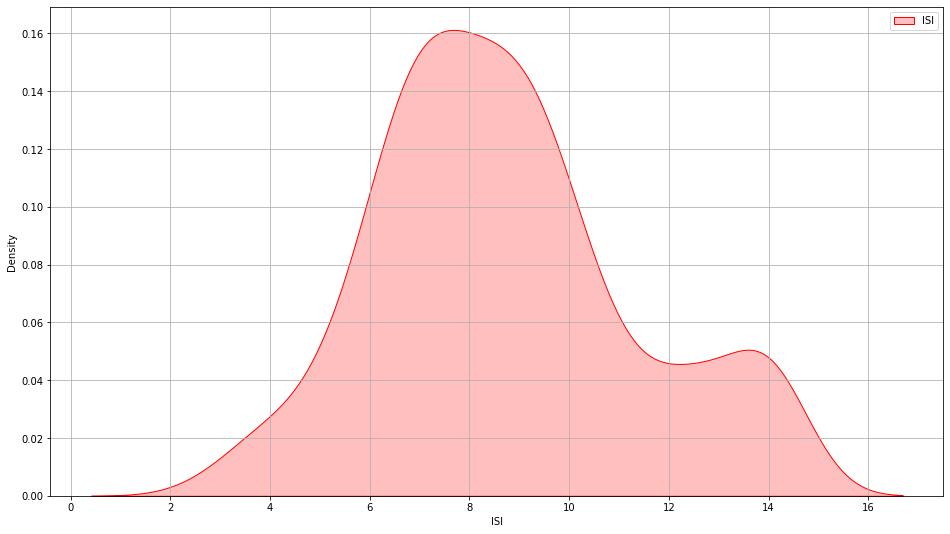

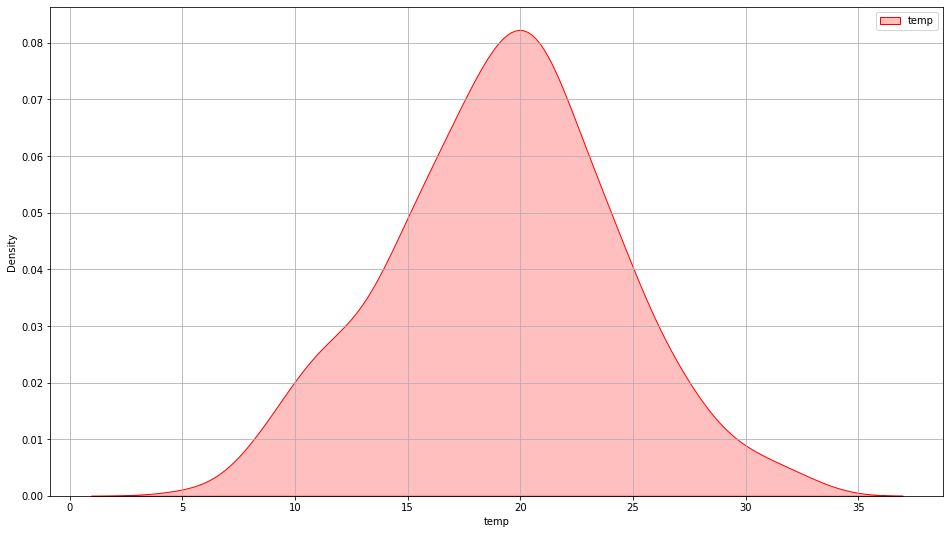

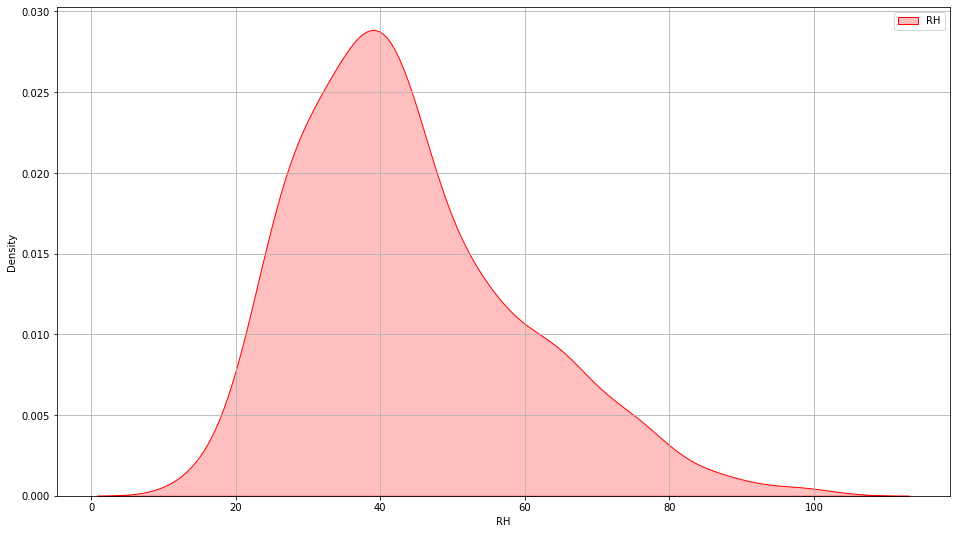

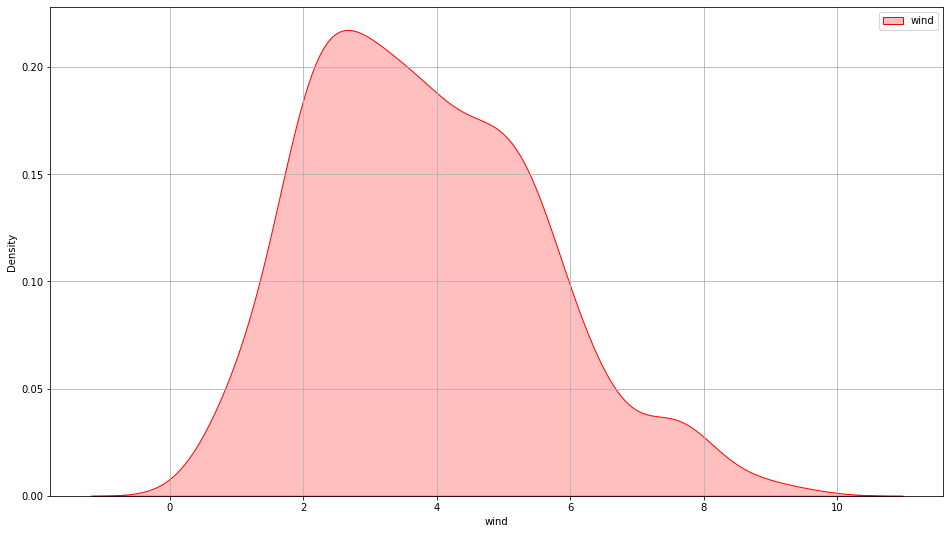

In [28]:
for param in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']:
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.kdeplot(df[param], shade=True, color='r', label=param)
    if param == 'FFMC':
        plt.legend(loc='upper left')
    else:
        plt.legend()

Матрица корреляций:

<AxesSubplot:>

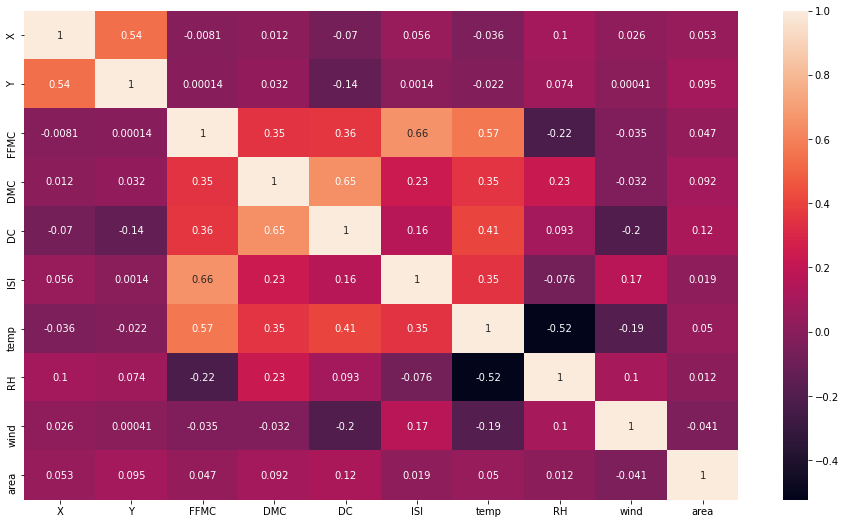

In [29]:
plt.figure(figsize=plotsize)
sns.heatmap(df.corr(), annot=True)

Area имеет наибольший коэфф. корреляции в DC, но его величина незначительна. Вероятные взаимосвязи:

FFMC c ISI, FFMC c temp, DMC c DC

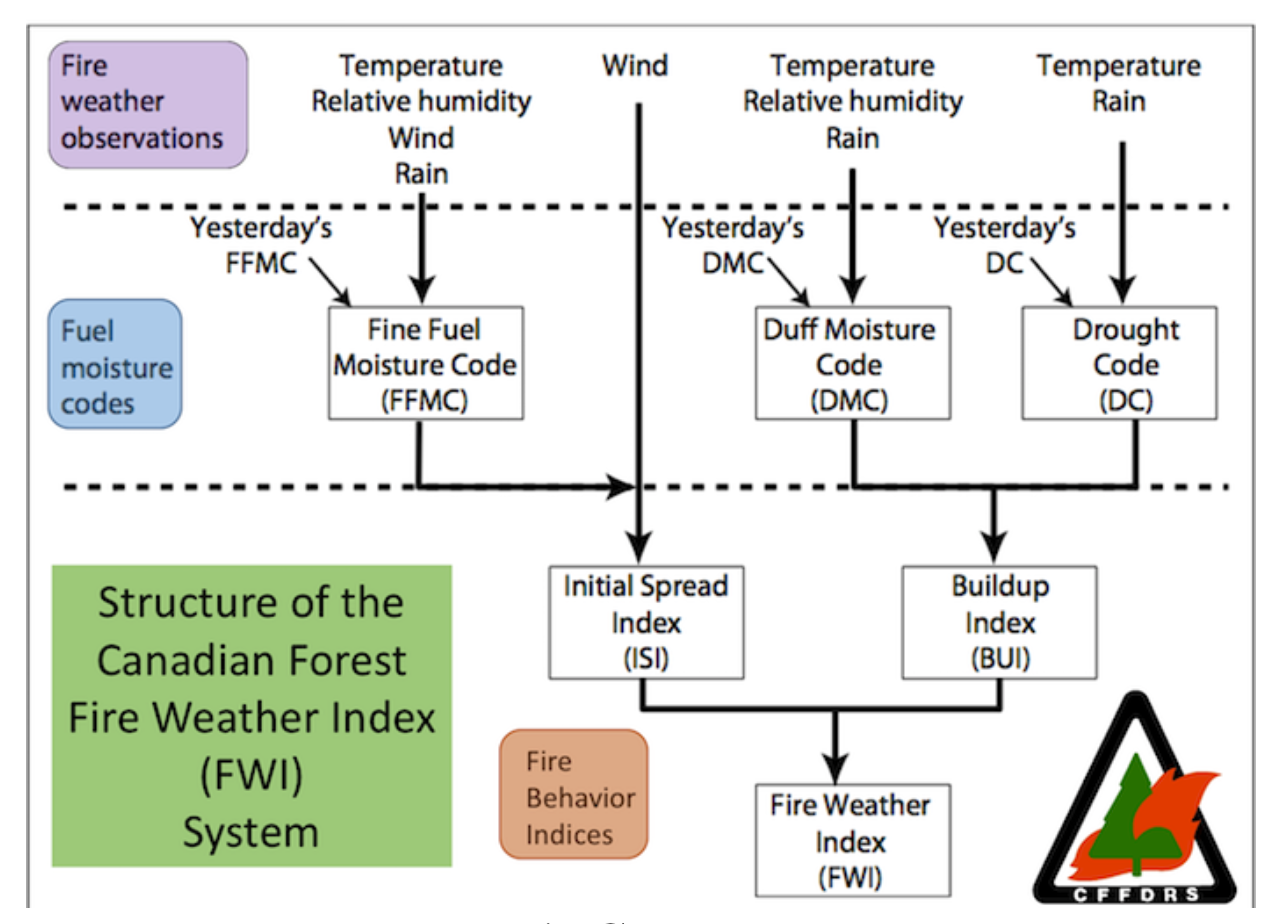

1) Взаимосвязь FFMC и ISI естественна - значения ISI вычисляются на основе FFMC. Ни один из них нельзя исключить из выборки, так как они характеризуют разные процессы (FFMC отражает способность топлива (древесины, напр.) к воспламенению, ISI - скорость распространения)

2) Взаимосвязь FFMC и temp также естественна: чем выше тепература, тем выше вероятность возгорания.

3) Взаимосвязь DMC и DC: DMC, помимо температуры и осадков, учитывает и относительную влажность воздуха (коэффициент корреляции при этом выше, чем в случае с DC). Оба параметра характеризуют похожие явления (содержание влаги в топливе), но на разных уровнях. DC отражает риск долговременного горения (по этой причине его можно считать значимым для случаев с большой площадью пожара), в то время как DMC подходит для оценки вероятности возникновения любого пожара (не только долговременного). Однако, коэффициент корреляции DC с area равен 0.12 и значимого влияния на итоговый результат не окажет. 

Итог: ислючим параметр DC.

In [30]:
df = df.drop(['DC'], axis=1)

<AxesSubplot:>

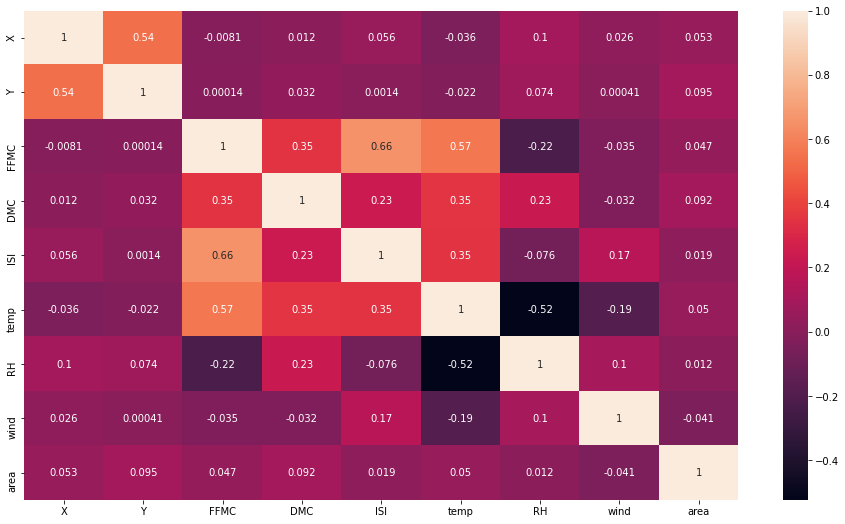

In [31]:
plt.figure(figsize=plotsize)
sns.heatmap(df.corr(), annot=True)

Воспользуемся методом клавных компонент:

FFMC  ->  0.39730641779894926
DMC  ->  0.22642062334386645
ISI  ->  0.1798315897549043
temp  ->  0.11089163758888285
RH  ->  0.046778568459415734
wind  ->  0.03877116305398137


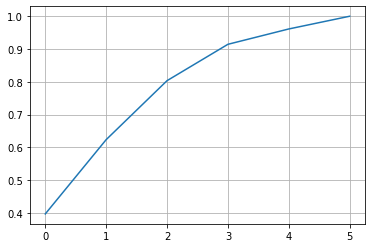

In [32]:
s_scaler = preprocessing.StandardScaler()
normalized_standart_data = df.copy()
tmp = s_scaler.fit_transform(df.loc[:, "FFMC" : "wind"])
normalized_standart_data.loc[:, "FFMC" : "wind"] = tmp
normalized_standart_data['X'] = normalized_standart_data['X'].astype('category')
normalized_standart_data['Y'] = normalized_standart_data['Y'].astype('category')
normalized_standart_data.describe()

X = normalized_standart_data.drop(['area', 'month', 'day', "X", 'Y'], axis=1)
pca = PCA(n_components=len(X.columns))
pca.fit_transform(X)
for index, ratio in enumerate(pca.explained_variance_ratio_):
    print(X.columns[index], ' -> ', ratio)
    
plt.grid(True)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Первые 4 параметра объясняют 91.4% дисперсии. Параметы FWI объясняют 80.3% дисперсии

##  AREA PREDICT

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [34]:
normalized_standart_data.describe()

,FFMC,DMC,ISI,temp,RH,wind,area
count,3.720000e+02,372.000000,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,372.000000
mean,6.360504e-15,0.000000,3.056098e-16,-3.724619e-16,-1.910061e-17,-1.957813e-16,2.419919
std,1.001347e+00,1.001347,1.001347e+00,1.001347e+00,1.001347e+00,1.001347e+00,4.280043
min,-3.077587e+00,-1.790442,-2.274081e+00,-2.775690e+00,-1.877811e+00,-2.001245e+00,0.000000
25%,-4.677184e-01,-0.545066,-6.579682e-01,-6.765052e-01,-7.088055e-01,-9.527055e-01,0.000000
50%,2.163198e-02,-0.110559,-1.192639e-01,2.995115e-02,-1.892476e-01,-1.371746e-01,0.000000
75%,5.109824e-01,0.450995,5.348772e-01,6.354852e-01,5.900893e-01,6.201041e-01,3.112500
max,2.468384e+00,2.745002,2.150990e+00,2.653932e+00,3.577547e+00,3.241453e+00,24.590000


In [35]:
clean_data = normalized_standart_data.drop(['month', 'day', "X", 'Y'], axis=1)
target = clean_data['area']
features = clean_data.drop(columns = 'area')

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

print ("Train data set size : ", x_train.shape)
print ("Test data set size : ", x_test.shape)
results = {}

Train data set size :  (297, 6)
Test data set size :  (75, 6)


In [36]:
print("Linear Regression")
lReg = LinearRegression()
lReg.fit(x_train, y_train)
prediction_lReg = lReg.predict(x_test)
score = explained_variance_score(y_test, prediction_lReg)
mae = mean_absolute_error(y_test, prediction_lReg)
r2Score = r2_score(y_test, prediction_lReg)
mse = mean_squared_error(y_test, prediction_lReg)

print("Score:", score)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2Score)
print("Mean Squared Error:", mse)
results["Clean Linear Regression"] = [score, mae, r2Score, mse]

Linear Regression
Score: -0.021438798135819725
Mean Absolute Error: 3.056866773631185
R2 Score: -0.02166954547091815
Mean Squared Error: 18.635375037082948


In [37]:
print('K-Neighbors Regressor')
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
prediction_knn = knn.predict(x_test)
score = explained_variance_score(y_test, prediction_knn)
mae = mean_absolute_error(y_test, prediction_knn)
r2Score = r2_score(y_test, prediction_knn)
mse = mean_squared_error(y_test, prediction_knn)

print("Score:", score)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2Score)
print("Mean Squared Error:", mse)
results["Clean K-Neighbors Regressor"] = [score, mae, r2Score, mse]

K-Neighbors Regressor
Score: -0.07990340352011693
Mean Absolute Error: 2.9998933333333335
R2 Score: -0.08038975603382625
Mean Squared Error: 19.706438719999998


In [38]:
print('Random Forest Regressor')
randomTree = RandomForestRegressor()
randomTree.fit(x_train, y_train)
prediction_randomTree = randomTree.predict(x_test)
score = explained_variance_score(y_test, prediction_randomTree)
mae = mean_absolute_error(y_test, prediction_randomTree)
r2Score = r2_score(y_test, prediction_randomTree)
mse = mean_squared_error(y_test, prediction_randomTree)

print("Score:", score)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2Score)
print("Mean Squared Error:", mse)
results["Clean RandomForest"] = [score, mae, r2Score, mse]

Random Forest Regressor
Score: -0.33203930916241453
Mean Absolute Error: 3.5306564063492054
R2 Score: -0.33635057179058614
Mean Squared Error: 24.375194696499534


In [39]:
print('Extra Trees Regressor')
extraTree = ExtraTreesRegressor()
extraTree.fit(x_train, y_train)
prediction_extraTree = extraTree.predict(x_test)
score = explained_variance_score(y_test, prediction_extraTree)
mae = mean_absolute_error(y_test, prediction_extraTree)
r2Score = r2_score(y_test, prediction_extraTree)
mse = mean_squared_error(y_test, prediction_extraTree)

print("Score:", score)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2Score)
print("Mean Squared Error:", mse)
results["Clean ExtraTrees"] = [score, mae, r2Score, mse]

Extra Trees Regressor
Score: -0.5884375389576688
Mean Absolute Error: 3.6277602222222223
R2 Score: -0.595803890645382
Mean Squared Error: 29.107654348359258


In [40]:
print('SVR')
svr = SVR(C = 100, kernel = 'linear')
svr.fit(x_train, y_train)
prediction_svr = svr.predict(x_test)
score = explained_variance_score(y_test, prediction_svr)
mae = mean_absolute_error(y_test, prediction_svr)
r2Score = r2_score(y_test, prediction_svr)
mse = mean_squared_error(y_test, prediction_svr)

print("Score:", score)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2Score)
print("Mean Squared Error:", mse)
results["Clean SVR"] = [score, mae, r2Score, mse]

SVR
Score: 5.916448281073627e-06
Mean Absolute Error: 2.4696400548179644
R2 Score: -0.30534106004867967
Mean Squared Error: 23.80957748339087


In [41]:
result_df = pd.DataFrame.from_dict(results)
result_df.index = ['explained_variance_score', 'mean_absolute_error', 'r2_score', 'mean_squared_error']

In [42]:
result_df

,Clean Linear Regression,Clean K-Neighbors Regressor,Clean RandomForest,Clean ExtraTrees,Clean SVR
explained_variance_score,-0.021439,-0.079903,-0.332039,-0.588438,0.000006
mean_absolute_error,3.056867,2.999893,3.530656,3.627760,2.469640
r2_score,-0.021670,-0.080390,-0.336351,-0.595804,-0.305341
mean_squared_error,18.635375,19.706439,24.375195,29.107654,23.809577


Значимость параметров (ExtraTreesRegressor):

In [43]:
for (index, item) in enumerate(['FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind']):
    print(item, "->", extraTree.feature_importances_[index])

FFMC -> 0.12666208110252633
DMC -> 0.1863584047150335
ISI -> 0.13224257026481062
temp -> 0.20222169032592174
RH -> 0.1806759215032468
wind -> 0.17183933208846092


Значимость параметров (RandomForestRegressor):

In [44]:
for (index, item) in enumerate(['FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind']):
    print(item, "->", randomTree.feature_importances_[index])

FFMC -> 0.10539326402541715
DMC -> 0.24253303698390144
ISI -> 0.12229117776717735
temp -> 0.23581376712949306
RH -> 0.17889093976718345
wind -> 0.11507781432682752


In [45]:
df.describe()

,X,Y,FFMC,DMC,ISI,temp,RH,wind,area
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,4.583333,4.271505,91.560215,118.990054,8.709946,19.251613,43.913978,3.835484,2.419919
std,2.318574,1.201502,1.841650,62.856799,2.602328,4.960977,15.418444,1.718985,4.280043
min,1.000000,2.000000,85.900000,6.600000,2.800000,5.500000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.700000,84.775000,7.000000,15.900000,33.000000,2.200000,0.000000
50%,4.000000,4.000000,91.600000,112.050000,8.400000,19.400000,41.000000,3.600000,0.000000
75%,6.250000,5.000000,92.500000,147.300000,10.100000,22.400000,53.000000,4.900000,3.112500
max,9.000000,9.000000,96.100000,291.300000,14.300000,32.400000,99.000000,9.400000,24.590000


Удаленные данные:

In [46]:
pd.set_option('display.max_rows', 150)
print(deleted_df)

     X  Y month  day  FFMC    DMC     DC   ISI  temp   RH  wind  rain     area
5    8  6   aug  sun  92.3   85.3  488.0  14.7  22.2   29   5.4   0.0     0.00
11   7  5   sep  sat  92.8   73.2  713.0  22.6  19.3   38   4.0   0.0     0.00
12   6  5   aug  fri  63.5   70.8  665.3   0.8  17.0   72   6.7   0.0     0.00
17   8  5   oct  mon  84.9   32.8  664.2   3.0  16.7   47   4.9   0.0     0.00
22   7  4   jun  sun  94.3   96.3  200.0  56.1  21.0   44   4.5   0.0     0.00
24   7  4   aug  sat  93.5  139.4  594.2  20.3  23.7   32   5.8   0.0     0.00
30   6  3   sep  fri  94.3   85.1  692.3  15.9  25.4   24   3.6   0.0     0.00
40   4  4   jul  tue  79.5   60.6  366.7   1.5  23.3   37   3.1   0.0     0.00
42   4  4   aug  tue  94.8  108.3  647.1  17.0  16.6   54   5.4   0.0     0.00
45   5  6   sep  wed  94.3   85.1  692.3  15.9  25.9   24   4.0   0.0     0.00
58   2  2   feb  mon  84.0    9.3   34.0   2.1  13.9   40   5.4   0.0     0.00
71   4  5   sep  fri  94.3   85.1  692.3  15.9  17.7